# 1. Classification with the Iris dataset<br/><sub>or _the dangers of overfitting_</sub>


*Let's use the classical [Iris flower dataset](http://en.wikipedia.org/wiki/Iris_flower_data_set) to play with the concepts of feature extraction, training, testing and overfitting in a simple way*.

We'll use [scikit-learn](http://scikit-learn.org/stable/) for all ML processing.

In [402]:
# First the basic imports
import random
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [403]:
# Load the IRIS dataset, by importing it from scikit-learn
from sklearn import datasets
iris = datasets.load_iris()
cnames = ('Iris-Setosa','Iris-Versicolor','Iris-Virginica')

In [404]:
# Let's randomize the data.
from sklearn.utils import shuffle, check_random_state

# We fix the random state, so that results are repeatable
random_seed = 42
check_random_state( random_seed )

X, Y = shuffle( iris.data, iris.target )

In [405]:
# Print the first 10 datapoints: instance class (the target) and instance features (4 figures)
for data,target in zip(X[:10],Y[:10]):
    print "{:20}".format(cnames[target]), data

Iris-Setosa          [ 4.6  3.6  1.   0.2]
Iris-Virginica       [ 6.9  3.2  5.7  2.3]
Iris-Setosa          [ 5.4  3.4  1.5  0.4]
Iris-Setosa          [ 5.1  3.3  1.7  0.5]
Iris-Versicolor      [ 6.3  2.3  4.4  1.3]
Iris-Virginica       [ 6.1  2.6  5.6  1.4]
Iris-Virginica       [ 6.3  2.8  5.1  1.5]
Iris-Setosa          [ 5.   3.6  1.4  0.2]
Iris-Virginica       [ 6.7  3.3  5.7  2.1]
Iris-Setosa          [ 4.9  3.1  1.5  0.1]


In [406]:
# To make easier to visualize the feature space, simplify by separating the features into two groups
X1 = X[:, :2]  # the first two features.
X2 = X[:, 2:]  # the last two features.

# Print the first 10 datapoints. Same as before, only features are splitted now
for data1, data2,target in zip(X1[:10],X2[:10],Y[:10]):
    print "{:20}".format(cnames[target]), data1, data2

Iris-Setosa          [ 4.6  3.6] [ 1.   0.2]
Iris-Virginica       [ 6.9  3.2] [ 5.7  2.3]
Iris-Setosa          [ 5.4  3.4] [ 1.5  0.4]
Iris-Setosa          [ 5.1  3.3] [ 1.7  0.5]
Iris-Versicolor      [ 6.3  2.3] [ 4.4  1.3]
Iris-Virginica       [ 6.1  2.6] [ 5.6  1.4]
Iris-Virginica       [ 6.3  2.8] [ 5.1  1.5]
Iris-Setosa          [ 5.   3.6] [ 1.4  0.2]
Iris-Virginica       [ 6.7  3.3] [ 5.7  2.1]
Iris-Setosa          [ 4.9  3.1] [ 1.5  0.1]


In [429]:
# Initialize the plotting space
plt.rcdefaults();
plt.xkcd();  # add some geekyness
plt.rcParams['figure.figsize'] = 16, 6;
plt.rcParams['figure.facecolor'] = 'white';
plt.clf();

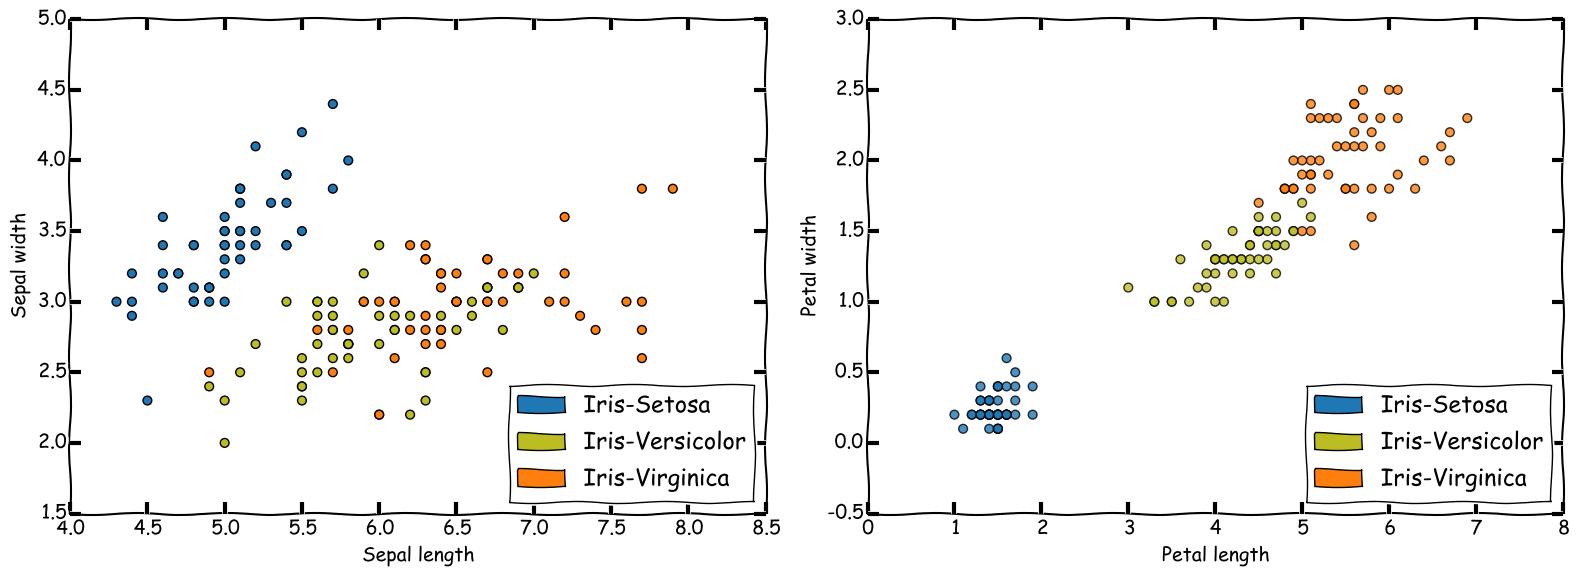

In [408]:
# Plot feature space, each feature pair as 2D plane

# Prepare a colormap, and a legend with the colours used in the graph
import matplotlib.patches as mpatches
import matplotlib.colors as clrs
colors = np.array( ((31, 119, 180), (188, 189, 34), (255, 127, 14)) )
custom_cmap = clrs.ListedColormap( colors/255.0 )
recs = [ mpatches.Circle((0,0),fc=col) for col in custom_cmap.colors ]

plt.figure(1, figsize=(16, 6), dpi=200)

# Plot features 1 & 2
plt.subplot(121)
cs = plt.scatter(X1[:, 0], X1[:, 1], c=Y, s=40, cmap=custom_cmap )
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend( recs, cnames, loc=4 )

# Plot features 3 & 4
plt.subplot(122)
plt.scatter(X2[:, 0], X2[:, 1], c=Y, s=40, alpha=0.8, cmap=custom_cmap) 
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend( recs, cnames, loc=4 )

plt.tight_layout()

In [ ]:
# The Setosa species is easily separable. So let's retain only the more interesting Versicolor & Virginica samples
XX = X2[Y!=0,]
YY = Y[Y!=0,]

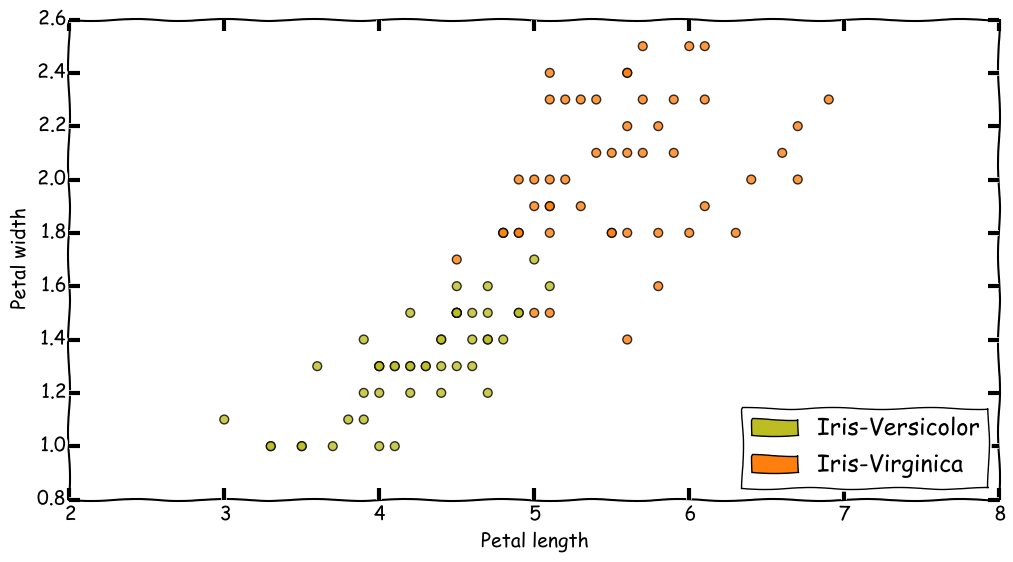

In [409]:
# We will work only with features 3 & 4. Plot the resulting datapoints
plt.figure(2, figsize=(12, 6), dpi=200)
norm = clrs.Normalize(0,2)  # ensure the color is not modified
p1 = plt.scatter(XX[:, 0], XX[:, 1], c=YY, s=40, alpha=0.8, cmap=custom_cmap, norm=norm ) 
plt.xlabel('Petal length')
plt.ylabel('Petal width')
l = plt.legend( recs[1:], cnames[1:], loc=4 )

In [410]:
# In order to plot the decision surfaces of our classifier, let's built a mesh for the features we are using

def mesh( data, size=[800,600] ):
    """Create a mesh to plot""" 
    x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
    y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
    return np.meshgrid( np.arange(x_min, x_max, (x_max-x_min)/size[1]),
                        np.arange(y_min, y_max, (y_max-y_min)/size[0]) )

# Create a mesh for our features
xx, yy = mesh( XX )
dataplane = np.c_[xx.ravel(), yy.ravel()] 

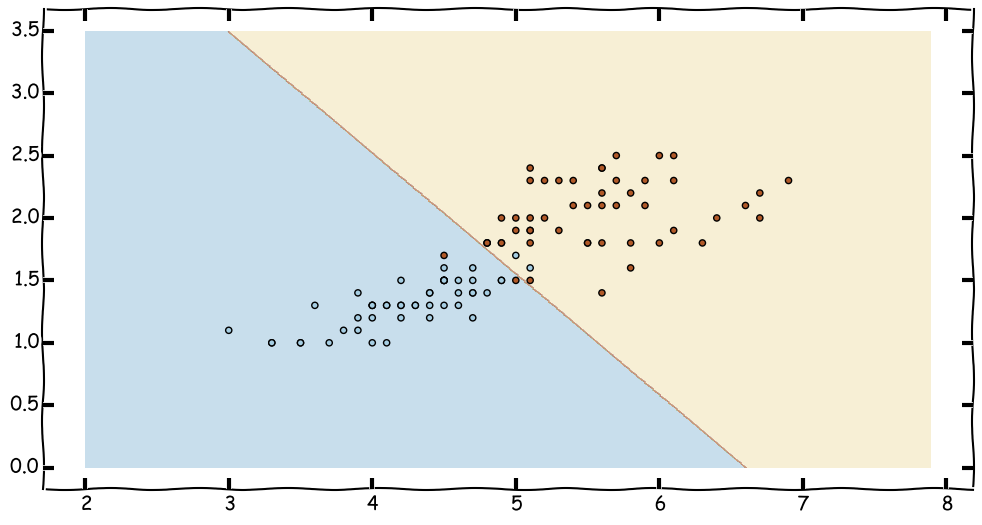

In [422]:
# Ok, let's make a standard classifier using a simple linear SVM
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1).fit(XX, YY)

# Now we build the decision surfaces by predicting class over our mesh
Z = svc.predict( dataplane )
Z = Z.reshape( xx.shape )

# And plot!
f = plt.figure(3, figsize=(12, 6), dpi=200)
ax = plt.subplot(111)
p1 = plt.contourf( xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
p2 = plt.scatter(XX[:, 0], XX[:, 1], c=YY, cmap=plt.cm.Paired)

#for b in ("top","right","bottom","left"):
#    ax.spines[b].set_visible(False)

## <a name="overfitting">The dangers of overfitting</a>
Ok, that was straightforward. Let's get deeper by adding complexity to our model and see how that affects results.

_Technical note: since the regularization built in by default in the used soft-margin SVM classifiers acts against overfitting, and we **want** to show the effects of overfitting, we'll mostly disable that regularization by shifting the C parameter away from its practical range_

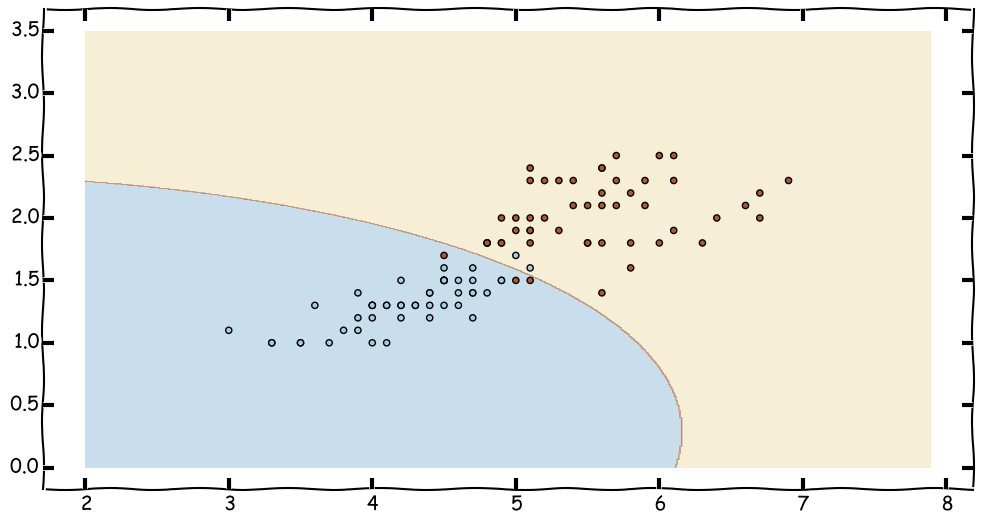

In [412]:
# Let's get more involved. We try now a polynomial kernel, degree 2. 
# Note the low regularization! (we are trying to encourage overfitting)
svc = svm.SVC(kernel='poly', degree=2, C=60).fit(XX, YY)
Z = svc.predict( dataplane )
Z = Z.reshape( xx.shape )

plt.figure(3, figsize=(12, 6), dpi=200)
p1 = plt.contourf( xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
p2 = plt.scatter(XX[:, 0], XX[:, 1], c=YY, cmap=plt.cm.Paired)

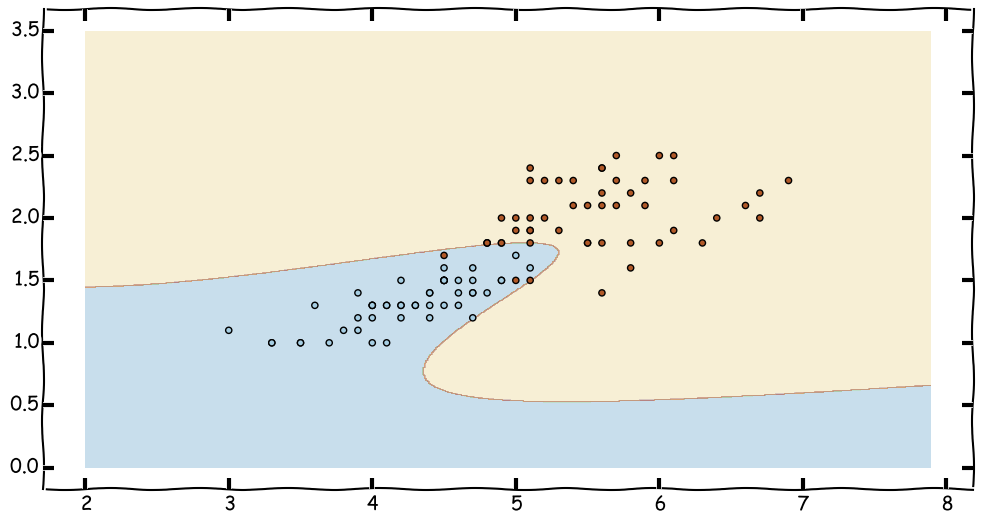

In [413]:
# Further down the line: try a polynomial kernel, degree 5. Even lower regularization!
svc = svm.SVC(kernel='poly', degree=5, C=2000).fit(XX, YY)
Z = svc.predict( dataplane )
Z = Z.reshape( xx.shape )

plt.figure(3, figsize=(12, 6), dpi=200)
p1 = plt.contourf( xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
p2 = plt.scatter(XX[:, 0], XX[:, 1], c=YY, cmap=plt.cm.Paired)

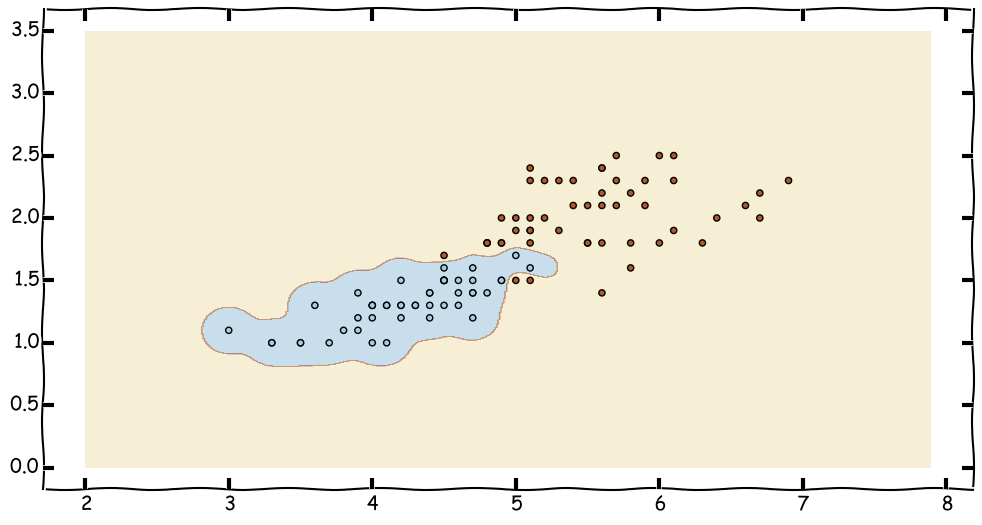

In [414]:
# Let's get overboard here: a Gaussian kernel, minimal regularization
svc = svm.SVC(kernel='rbf', gamma=50, C=2000).fit(XX, YY)
Z = svc.predict( dataplane )
Z = Z.reshape( xx.shape )

plt.figure(3, figsize=(12, 6), dpi=200)
p1 = plt.contourf( xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
p2 = plt.scatter(XX[:, 0], XX[:, 1], c=YY, cmap=plt.cm.Paired)

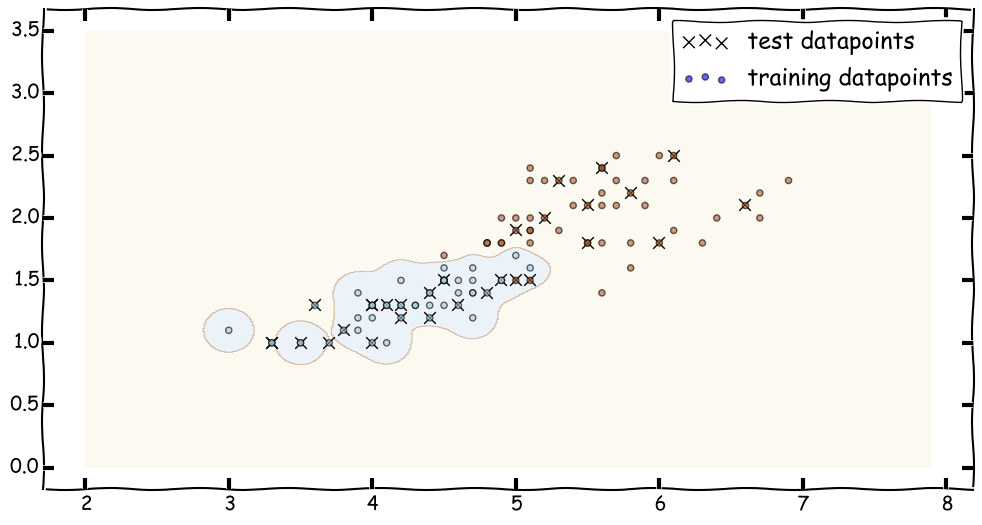

In [421]:
# Ok, back to reason. Let's do what we should have been doing all along: separate
# an off-training test dataset, and validate with it. We'll now see the bad
# effects of overfitting
from sklearn.cross_validation import train_test_split

rs = check_random_state( 1352 )
XXr, XXt, YYr, YYt = train_test_split( XX, YY, test_size=0.30, random_state=rs )

svc = svm.SVC(kernel='rbf', gamma=50, C=2000).fit(XXr, YYr)
Z = svc.predict( dataplane )
Z = Z.reshape( xx.shape )

f = plt.figure(3, figsize=(12, 6), dpi=200)
p1 = plt.contourf( xx, yy, Z, cmap=plt.cm.Paired, alpha=0.1)
p2 = plt.scatter(XXt[:, 0], XXt[:, 1], marker='x', c="k", cmap=plt.cm.Paired, s=70, alpha=1.0, label='test datapoints')
p3 = plt.scatter(XX[:, 0], XX[:, 1], c=YY, cmap=plt.cm.Paired, alpha=0.6, label='training datapoints')
l = plt.legend()